In [ ]:
pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=492a4ed82af92adf4b5969f19f064cfd83dfaff17a7183c74ce5de8338f758e1
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


# Data Exploration and Cleaning

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np

In [ ]:
btc_ohlc = pd.read_csv('/content/drive/MyDrive/Datasets/BTCUSDT3600.csv')

In [ ]:
btc_ohlc['date'] = pd.to_datetime(btc_ohlc['date'])


In [ ]:
btc_ohlc['date'].max() - btc_ohlc['date'].min()

Timedelta('1825 days 23:00:00')

In [ ]:
btc_ohlc.head()

,open,high,low,close,volume,date
0,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:00:00
1,13527.841167,13595.259915,13153.294540,13203.699294,384.940892,2018-01-01 01:00:00
2,13203.567250,13419.331793,13199.152380,13331.250914,429.888403,2018-01-01 02:00:00
3,13332.298878,13612.086569,13288.738587,13408.246493,421.922265,2018-01-01 03:00:00
4,13432.589137,13621.198504,13318.180709,13596.151799,342.690926,2018-01-01 04:00:00


In [ ]:
btc_ohlc = btc_ohlc.iloc[1:]

In [ ]:
btc_ohlc.set_index('date', inplace=True)

In [ ]:
btc_ohlc.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [ ]:
btc_ohlc

,open,high,low,close,volume
date,,,,,
2018-01-01 01:00:00,13527.841167,13595.259915,13153.294540,13203.699294,384.940892
2018-01-01 02:00:00,13203.567250,13419.331793,13199.152380,13331.250914,429.888403
2018-01-01 03:00:00,13332.298878,13612.086569,13288.738587,13408.246493,421.922265
2018-01-01 04:00:00,13432.589137,13621.198504,13318.180709,13596.151799,342.690926
2018-01-01 05:00:00,13613.108211,13697.367714,13524.132806,13556.770136,405.414787
...,...,...,...,...,...
2022-12-31 19:00:00,16577.716287,16589.996745,16565.164171,16570.118457,4139.299329
2022-12-31 20:00:00,16570.120747,16574.925554,16564.125024,16568.597952,2676.973597
2022-12-31 21:00:00,16568.194476,16571.613435,16544.177461,16548.288951,3671.785129


In [ ]:
btc_ohlc['year_month_day'] = btc_ohlc.index.date
btc_ohlc['time'] = btc_ohlc.index.time
btc_ohlc['month'] = btc_ohlc.index.month

In [ ]:
btc_ohlc

,open,high,low,close,volume,year_month_day,time,month
date,,,,,,,,
2018-01-01 01:00:00,13527.841167,13595.259915,13153.294540,13203.699294,384.940892,2018-01-01,01:00:00,1
2018-01-01 02:00:00,13203.567250,13419.331793,13199.152380,13331.250914,429.888403,2018-01-01,02:00:00,1
2018-01-01 03:00:00,13332.298878,13612.086569,13288.738587,13408.246493,421.922265,2018-01-01,03:00:00,1
2018-01-01 04:00:00,13432.589137,13621.198504,13318.180709,13596.151799,342.690926,2018-01-01,04:00:00,1
2018-01-01 05:00:00,13613.108211,13697.367714,13524.132806,13556.770136,405.414787,2018-01-01,05:00:00,1
...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,16577.716287,16589.996745,16565.164171,16570.118457,4139.299329,2022-12-31,19:00:00,12
2022-12-31 20:00:00,16570.120747,16574.925554,16564.125024,16568.597952,2676.973597,2022-12-31,20:00:00,12
2022-12-31 21:00:00,16568.194476,16571.613435,16544.177461,16548.288951,3671.785129,2022-12-31,21:00:00,12


In [ ]:
btc_ohlc['time_seconds'] = btc_ohlc.index.astype(int) / 10**9
btc_ohlc.head()


,open,high,low,close,volume,year_month_day,time,month,time_seconds
date,,,,,,,,,
2018-01-01 01:00:00,13527.841167,13595.259915,13153.294540,13203.699294,384.940892,2018-01-01,01:00:00,1,1.514768e+09
2018-01-01 02:00:00,13203.567250,13419.331793,13199.152380,13331.250914,429.888403,2018-01-01,02:00:00,1,1.514772e+09
2018-01-01 03:00:00,13332.298878,13612.086569,13288.738587,13408.246493,421.922265,2018-01-01,03:00:00,1,1.514776e+09
2018-01-01 04:00:00,13432.589137,13621.198504,13318.180709,13596.151799,342.690926,2018-01-01,04:00:00,1,1.514779e+09
2018-01-01 05:00:00,13613.108211,13697.367714,13524.132806,13556.770136,405.414787,2018-01-01,05:00:00,1,1.514783e+09


In [ ]:
btc_ohlc['date_time_column'] = btc_ohlc.index


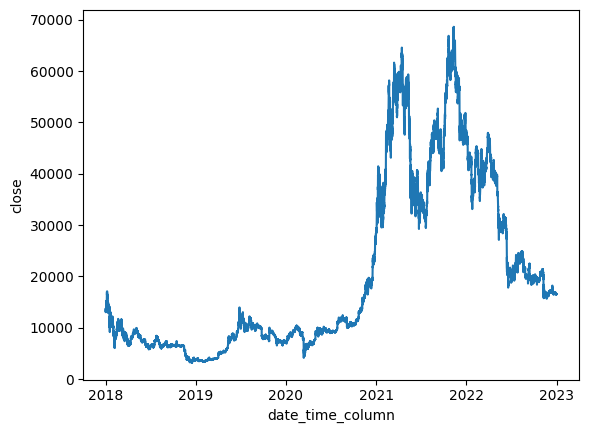

In [ ]:
import matplotlib.pyplot as plt
sns.lineplot(data=btc_ohlc, x="date_time_column", y="close")
plt.show()


# Defining the Target

## SQL

In [ ]:
#import sqlite3

#conn = sqlite3.connect("my_db1.db")

#btc_ohlc.to_sql("btc_ohlc_sql", conn, if_exists="replace",index=False)

In [ ]:
#query = """
#SELECT date_time_column, COUNT(*) AS duplicate_count
#FROM btc_ohlc_sql
#GROUP BY date_time_column
#HAVING COUNT(*) > 1;
#"""

#unique_check = pd.read_sql_query(query, conn)
#unique_check

In [ ]:
#query = """
#SELECT DISTINCT a.time_seconds, MIN(b.time_seconds) as TP_time
#FROM btc_ohlc_sql a
#JOIN btc_ohlc_sql b ON a.time_seconds < b.time_seconds AND (b.time_seconds - a.time_seconds) <= 5 * 3600
#WHERE (b.close - a.close) / a.close >= 0.02;
#"""

#TP = pd.read_sql_query(query, conn)
#TP

Find the maximum return in the next x hours

In [ ]:
#query = """
#SELECT a.date_time_column, a.time_seconds, MAX((b.close - a.close) / a.close) AS max_return
#FROM btc_ohlc_sql a
#JOIN btc_ohlc_sql b ON a.time_seconds < b.time_seconds AND (b.time_seconds - a.time_seconds) <= 5 * 3600
#GROUP BY a.time_seconds;
#"""


#max_return = pd.read_sql_query(query, conn)
#max_return

In [ ]:
#max_return.to_csv('/content/drive/MyDrive/Datasets/max_return.csv')

In [ ]:
max_return = pd.read_csv('/content/drive/MyDrive/Datasets/max_return.csv')

In [ ]:
max_return['date_time_column'] = pd.to_datetime(max_return['date_time_column'])

In [ ]:
btc_ohlc = pd.merge(btc_ohlc, max_return, on=["date_time_column"])

In [ ]:
btc_ohlc = btc_ohlc.drop(columns=['time_seconds_y'])

In [ ]:
btc_ohlc.set_index('date_time_column', inplace=True)

In [ ]:
btc_ohlc.head()

,open,high,low,close,volume,year_month_day,time,month,time_seconds_x,Unnamed: 0,max_return
date_time_column,,,,,,,,,,,
2018-01-01 01:00:00,13527.841167,13595.259915,13153.294540,13203.699294,384.940892,2018-01-01,01:00:00,1,1.514768e+09,0,0.043346
2018-01-01 02:00:00,13203.567250,13419.331793,13199.152380,13331.250914,429.888403,2018-01-01,02:00:00,1,1.514772e+09,1,0.033363
2018-01-01 03:00:00,13332.298878,13612.086569,13288.738587,13408.246493,421.922265,2018-01-01,03:00:00,1,1.514776e+09,2,0.027429
2018-01-01 04:00:00,13432.589137,13621.198504,13318.180709,13596.151799,342.690926,2018-01-01,04:00:00,1,1.514779e+09,3,0.013230
2018-01-01 05:00:00,13613.108211,13697.367714,13524.132806,13556.770136,405.414787,2018-01-01,05:00:00,1,1.514783e+09,4,0.016173


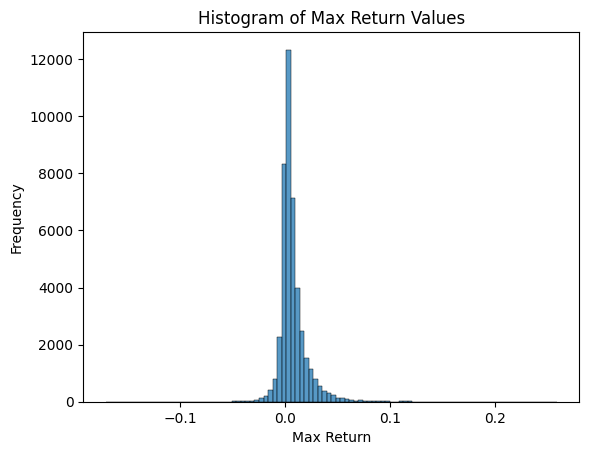

In [ ]:
sns.histplot(btc_ohlc['max_return'], bins=100)
plt.xlabel('Max Return')
plt.ylabel('Frequency')
plt.title('Histogram of Max Return Values')
plt.show()

In [ ]:
btc_ohlc['max_return'].describe()

count    43822.000000
mean         0.006961
std          0.013553
min         -0.171342
25%          0.000283
50%          0.003918
75%          0.010325
max          0.258834
Name: max_return, dtype: float64

In [ ]:
btc_ohlc

,open,high,low,close,volume,year_month_day,time,month,time_seconds_x,Unnamed: 0,max_return
date_time_column,,,,,,,,,,,
2018-01-01 01:00:00,13527.841167,13595.259915,13153.294540,13203.699294,384.940892,2018-01-01,01:00:00,1,1.514768e+09,0,0.043346
2018-01-01 02:00:00,13203.567250,13419.331793,13199.152380,13331.250914,429.888403,2018-01-01,02:00:00,1,1.514772e+09,1,0.033363
2018-01-01 03:00:00,13332.298878,13612.086569,13288.738587,13408.246493,421.922265,2018-01-01,03:00:00,1,1.514776e+09,2,0.027429
2018-01-01 04:00:00,13432.589137,13621.198504,13318.180709,13596.151799,342.690926,2018-01-01,04:00:00,1,1.514779e+09,3,0.013230
2018-01-01 05:00:00,13613.108211,13697.367714,13524.132806,13556.770136,405.414787,2018-01-01,05:00:00,1,1.514783e+09,4,0.016173
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 18:00:00,16581.436089,16589.323978,16571.783893,16577.749146,3390.449783,2022-12-31,18:00:00,12,1.672510e+09,43817,-0.000460
2022-12-31 19:00:00,16577.716287,16589.996745,16565.164171,16570.118457,4139.299329,2022-12-31,19:00:00,12,1.672513e+09,43818,-0.000092
2022-12-31 20:00:00,16570.120747,16574.925554,16564.125024,16568.597952,2676.973597,2022-12-31,20:00:00,12,1.672517e+09,43819,-0.001226


In [ ]:
btc_ohlc.drop(columns=['Unnamed: 0'], inplace=True)

## Pandas

Identify local minimums,

If the current close is less than the neighboring 'n' close prices return True

Implement a percentage gain required by the point 'n' rows after the current row

In [ ]:
#btc_ohlc['is_local_minimum'] = ((btc_ohlc['close'] < btc_ohlc['close'].shift(1)) & (btc_ohlc['close'] < btc_ohlc['close'].shift(-1))
#                               & (btc_ohlc['close'] < btc_ohlc['close'].shift(2)) & (btc_ohlc['close'] < btc_ohlc['close'].shift(-2))
#                                & (btc_ohlc['close'] < btc_ohlc['close'].shift(3)) & (btc_ohlc['close'] < btc_ohlc['close'].shift(-3))
#                                & (btc_ohlc['close'] < btc_ohlc['close'].shift(4)) & (btc_ohlc['close'] < btc_ohlc['close'].shift(-4))
#                                & (btc_ohlc['close'] < btc_ohlc['close'].shift(5)) & (btc_ohlc['close'] < btc_ohlc['close'].shift(-5))
#                                & (btc_ohlc['close'] < btc_ohlc['close'].shift(6)) & (btc_ohlc['close'] < btc_ohlc['close'].shift(-6))
#                                & (btc_ohlc['close']*1.005 < btc_ohlc['close'].shift(7)) & (btc_ohlc['close'] < btc_ohlc['close'].shift(-7)))
#btc_ohlc.head(3)


In [ ]:
#btc_ohlc['target'] = btc_ohlc['is_local_minimum'].apply(lambda x: 1 if x else 0)


In [ ]:
#btc_ohlc['target'].value_counts()

In [ ]:
#target_counts = btc_ohlc['target'].value_counts()
#percentage_1 = target_counts[1] / (target_counts[1] + target_counts[0]) * 100
#percentage_0 = target_counts[0] / (target_counts[1] + target_counts[0]) * 100
#print(f"Percentage of target being 1: {percentage_1:.2f}%")
#print(f"Percentage of target being 0: {percentage_0:.2f}%")


In [ ]:
#btc_ohlc = btc_ohlc.drop('is_local_minimum', axis=1)

#btc_ohlc.head()


In [ ]:
#import matplotlib.pyplot as plt

# Filter data for the specified year range
#btc_ohlc_filtered = (btc_ohlc[btc_ohlc.index.year == 2022])
#btc_ohlc_filtered = (btc_ohlc_filtered[btc_ohlc_filtered['month'] == 9])
# Plot the close price time series
#plt.plot(btc_ohlc_filtered.index, btc_ohlc_filtered['close'])

# Add green dots for target values
#for date, row in btc_ohlc_filtered.iterrows():
#   if row['target'] == 1:
#       plt.plot(date, row['close'], marker='o', color='green', )

# Add labels and title
#plt.xlabel('Date')
#plt.ylabel('Close Price')
#plt.title('BTCUSDT Close Price with Local Minima 2022 August')

# Show the plot
#plt.show()


# Feature Engineering

## Return

In [ ]:
btc_ohlc['today_return'] = (btc_ohlc['close'] - btc_ohlc['close'].shift(1)) / btc_ohlc['close'].shift(1)


In [ ]:
for i in range(1, 6):
    btc_ohlc[f'lag{i}_day_return'] = btc_ohlc['today_return'].shift(i)

In [ ]:
btc_ohlc

,open,high,low,close,volume,year_month_day,time,month,time_seconds_x,max_return,today_return,lag1_day_return,lag2_day_return,lag3_day_return,lag4_day_return,lag5_day_return
date_time_column,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,13527.841167,13595.259915,13153.294540,13203.699294,384.940892,2018-01-01,01:00:00,1,1.514768e+09,0.043346,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,13203.567250,13419.331793,13199.152380,13331.250914,429.888403,2018-01-01,02:00:00,1,1.514772e+09,0.033363,0.009660,NaN,NaN,NaN,NaN,NaN
2018-01-01 03:00:00,13332.298878,13612.086569,13288.738587,13408.246493,421.922265,2018-01-01,03:00:00,1,1.514776e+09,0.027429,0.005776,0.009660,NaN,NaN,NaN,NaN
2018-01-01 04:00:00,13432.589137,13621.198504,13318.180709,13596.151799,342.690926,2018-01-01,04:00:00,1,1.514779e+09,0.013230,0.014014,0.005776,0.009660,NaN,NaN,NaN
2018-01-01 05:00:00,13613.108211,13697.367714,13524.132806,13556.770136,405.414787,2018-01-01,05:00:00,1,1.514783e+09,0.016173,-0.002897,0.014014,0.005776,0.009660,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 18:00:00,16581.436089,16589.323978,16571.783893,16577.749146,3390.449783,2022-12-31,18:00:00,12,1.672510e+09,-0.000460,-0.000259,-0.001107,0.000620,0.000221,-0.000868,0.001533
2022-12-31 19:00:00,16577.716287,16589.996745,16565.164171,16570.118457,4139.299329,2022-12-31,19:00:00,12,1.672513e+09,-0.000092,-0.000460,-0.000259,-0.001107,0.000620,0.000221,-0.000868
2022-12-31 20:00:00,16570.120747,16574.925554,16564.125024,16568.597952,2676.973597,2022-12-31,20:00:00,12,1.672517e+09,-0.001226,-0.000092,-0.000460,-0.000259,-0.001107,0.000620,0.000221


## RSI

In [ ]:
import pandas_ta as ta

In [ ]:
period = 14
btc_ohlc['RSI'] = ta.rsi(btc_ohlc['close'], timeperiod=period)


In [ ]:
btc_ohlc['RSI'].fillna(method='bfill', inplace=True)

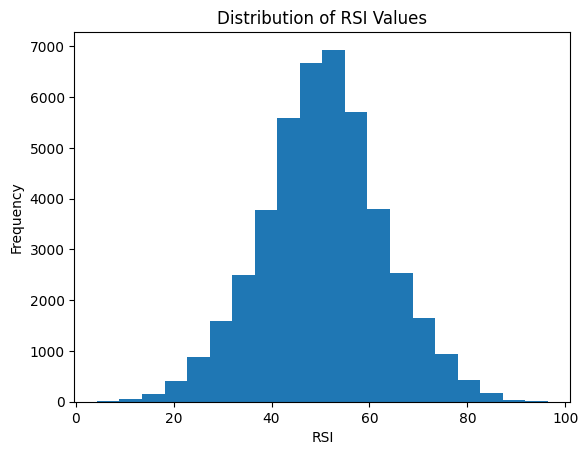

In [ ]:
plt.hist(btc_ohlc['RSI'], bins=20)

plt.xlabel('RSI')
plt.ylabel('Frequency')
plt.title('Distribution of RSI Values')
plt.show()


In [ ]:
btc_ohlc.head(3)

,open,high,low,close,volume,year_month_day,time,month,time_seconds_x,max_return,today_return,lag1_day_return,lag2_day_return,lag3_day_return,lag4_day_return,lag5_day_return,RSI
date_time_column,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,13527.841167,13595.259915,13153.294540,13203.699294,384.940892,2018-01-01,01:00:00,1,1.514768e+09,0.043346,NaN,NaN,NaN,NaN,NaN,NaN,47.009542
2018-01-01 02:00:00,13203.567250,13419.331793,13199.152380,13331.250914,429.888403,2018-01-01,02:00:00,1,1.514772e+09,0.033363,0.009660,NaN,NaN,NaN,NaN,NaN,47.009542
2018-01-01 03:00:00,13332.298878,13612.086569,13288.738587,13408.246493,421.922265,2018-01-01,03:00:00,1,1.514776e+09,0.027429,0.005776,0.00966,NaN,NaN,NaN,NaN,47.009542


## ATR

In [ ]:
btc_ohlc['ATR'] = ta.atr(btc_ohlc['high'], btc_ohlc['low'], btc_ohlc['close'], length=14)

In [ ]:
btc_ohlc['ATR_open_close_diff'] = btc_ohlc['ATR'] - (btc_ohlc['close']- btc_ohlc['open'])

## CCI

In [ ]:
btc_ohlc['CCI'] = ta.cci(btc_ohlc['high'], btc_ohlc['low'], btc_ohlc['close'], length=20)

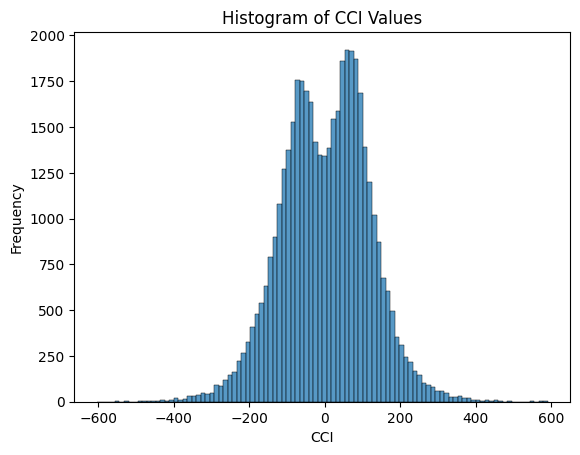

In [ ]:
sns.histplot(btc_ohlc['CCI'], bins=100)
plt.xlabel('CCI')
plt.ylabel('Frequency')
plt.title('Histogram of CCI Values')
plt.show()


In [ ]:
btc_ohlc['CCI_above_100'] = btc_ohlc['CCI'].apply(lambda x: 1 if x > 100 else 0)
btc_ohlc['CCI_below_100'] = btc_ohlc['CCI'].apply(lambda x: 1 if x < -100 else 0)

## Moving Average

In [ ]:
btc_ohlc['3hr_ma'] = btc_ohlc['close'].rolling(window=3).mean()
btc_ohlc['6hr_ma'] = btc_ohlc['close'].rolling(window=6).mean()
btc_ohlc['8hr_ma'] = btc_ohlc['close'].rolling(window=8).mean()
btc_ohlc['12hr_ma'] = btc_ohlc['close'].rolling(window=12).mean()
btc_ohlc['24hr_ma'] = btc_ohlc['close'].rolling(window=24).mean()
btc_ohlc['48hr_ma'] = btc_ohlc['close'].rolling(window=48).mean()

In [ ]:
btc_ohlc['6hr_3hr_diff'] = btc_ohlc['6hr_ma']- btc_ohlc['3hr_ma']
btc_ohlc['12hr_6hr_diff'] = btc_ohlc['12hr_ma']- btc_ohlc['6hr_ma']
btc_ohlc['12hr_48hr_diff'] = btc_ohlc['12hr_ma']- btc_ohlc['48hr_ma']
btc_ohlc['24hr_12hr_diff'] = btc_ohlc['24hr_ma']- btc_ohlc['12hr_ma']
btc_ohlc['48hr_24hr_diff'] = btc_ohlc['48hr_ma']- btc_ohlc['24hr_ma']

In [ ]:
for col in ['6hr_3hr_diff', '12hr_6hr_diff', '24hr_12hr_diff', '48hr_24hr_diff', '12hr_48hr_diff']:
    btc_ohlc[f'{col}_negative'] = (btc_ohlc[col] < 0).astype(int)

## Support/Resistance

In [ ]:
btc_ohlc['Support'] = btc_ohlc['12hr_ma'] - 1.5 * btc_ohlc['close'].rolling(window=12).std()
btc_ohlc['Resistance'] = btc_ohlc['12hr_ma'] + 1.5 * btc_ohlc['close'].rolling(window=12).std()

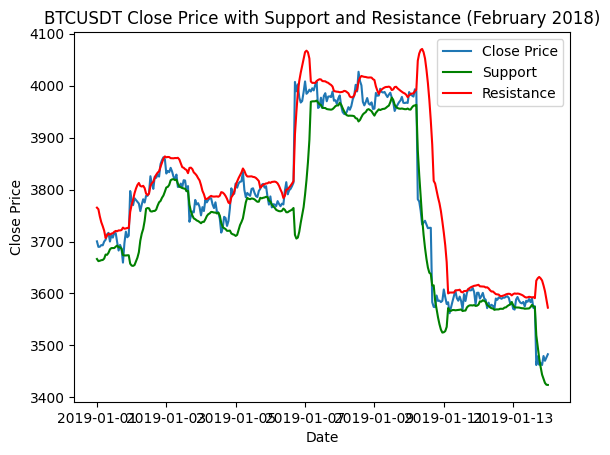

In [ ]:
import matplotlib.pyplot as plt
#btc_ohlc_feb2018 = btc_ohlc[btc_ohlc.index.year == 2018]
#btc_ohlc_feb2018 = btc_ohlc_feb2018[btc_ohlc_feb2018.index.month == 2]

btc_ohlc_feb2018 = btc_ohlc[btc_ohlc.index >= '2019-01-01']
btc_ohlc_feb2018 = btc_ohlc_feb2018[btc_ohlc_feb2018.index <= '2019-01-14']



# Plot the close price
plt.plot(btc_ohlc_feb2018.index, btc_ohlc_feb2018['close'], label='Close Price')

# Plot the support line
plt.plot(btc_ohlc_feb2018.index, btc_ohlc_feb2018['Support'], label='Support', color='green')

# Plot the resistance line
plt.plot(btc_ohlc_feb2018.index, btc_ohlc_feb2018['Resistance'], label='Resistance', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('BTCUSDT Close Price with Support and Resistance (February 2018)')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
btc_ohlc['below_support'] = (btc_ohlc['close'] < btc_ohlc['Support']).astype(int)

In [ ]:
btc_ohlc['above_resistance'] = (btc_ohlc['close'] > btc_ohlc['Resistance']).astype(int)

## Min-Max last n hours

In [ ]:
btc_ohlc['Min_Close_12H'] = btc_ohlc['close'].rolling(window=12).min()

btc_ohlc['Close_Distance_From_Min_12H'] = btc_ohlc['close'] - btc_ohlc['Min_Close_12H']


In [ ]:
min_value = btc_ohlc['Close_Distance_From_Min_12H'].min()
max_value = btc_ohlc['Close_Distance_From_Min_12H'].max()

btc_ohlc['Normalized_Close_Distance_From_Min_12H'] = (btc_ohlc['Close_Distance_From_Min_12H'] - min_value) / (max_value - min_value)

In [ ]:
btc_ohlc.drop('Close_Distance_From_Min_12H', axis=1, inplace=True)

## RSI Signal

In [ ]:
btc_ohlc['RSI_Under_50'] = ((btc_ohlc['RSI'] < 50)).astype(int)

In [ ]:
btc_ohlc['RSI_Under_50'].value_counts()

0    22806
1    21016
Name: RSI_Under_50, dtype: int64

In [ ]:
btc_ohlc['RSI_Support_Signal'] = ((btc_ohlc['RSI'] < 30) & (btc_ohlc['close'] < btc_ohlc['Support'])).astype(int)

In [ ]:
btc_ohlc['RSI_Support_Signal'].value_counts()

0    42628
1     1194
Name: RSI_Support_Signal, dtype: int64

## Volume Signals

In [ ]:
btc_ohlc['Return_per_Volume_Change'] = ((btc_ohlc['close'] - btc_ohlc['open'])/(btc_ohlc['open'])) / ((btc_ohlc['volume'] - btc_ohlc['volume'].shift(-1))/(btc_ohlc['volume'].shift(-1)))

## Time of Day

In [ ]:
btc_ohlc['morning'] = ((btc_ohlc.index.time >= pd.to_datetime('00:00:00').time()) & (btc_ohlc.index.time < pd.to_datetime('12:00:00').time())).astype(int)
btc_ohlc['afternoon'] = ((btc_ohlc.index.time >= pd.to_datetime('12:00:00').time()) & (btc_ohlc.index.time < pd.to_datetime('18:00:00').time())).astype(int)
btc_ohlc['evening'] = ((btc_ohlc.index.time >= pd.to_datetime('18:00:00').time()) & (btc_ohlc.index.time <= pd.to_datetime('23:59:59').time())).astype(int)

In [ ]:
btc_ohlc

,open,high,low,close,volume,year_month_day,time,month,time_seconds_x,max_return,...,below_support,above_resistance,Min_Close_12H,Normalized_Close_Distance_From_Min_12H,RSI_Under_50,RSI_Support_Signal,Return_per_Volume_Change,morning,afternoon,evening
date_time_column,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,13527.841167,13595.259915,13153.294540,13203.699294,384.940892,2018-01-01,01:00:00,1,1.514768e+09,0.043346,...,0,0,NaN,NaN,1,0,0.229169,1,0,0
2018-01-01 02:00:00,13203.567250,13419.331793,13199.152380,13331.250914,429.888403,2018-01-01,02:00:00,1,1.514772e+09,0.033363,...,0,0,NaN,NaN,1,0,0.512187,1,0,0
2018-01-01 03:00:00,13332.298878,13612.086569,13288.738587,13408.246493,421.922265,2018-01-01,03:00:00,1,1.514776e+09,0.027429,...,0,0,NaN,NaN,1,0,0.024639,1,0,0
2018-01-01 04:00:00,13432.589137,13621.198504,13318.180709,13596.151799,342.690926,2018-01-01,04:00:00,1,1.514779e+09,0.013230,...,0,0,NaN,NaN,1,0,-0.078703,1,0,0
2018-01-01 05:00:00,13613.108211,13697.367714,13524.132806,13556.770136,405.414787,2018-01-01,05:00:00,1,1.514783e+09,0.016173,...,0,0,NaN,NaN,1,0,-0.007970,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 18:00:00,16581.436089,16589.323978,16571.783893,16577.749146,3390.449783,2022-12-31,18:00:00,12,1.672510e+09,-0.000460,...,0,0,16544.294314,0.005591,0,0,0.001229,0,0,1
2022-12-31 19:00:00,16577.716287,16589.996745,16565.164171,16570.118457,4139.299329,2022-12-31,19:00:00,12,1.672513e+09,-0.000092,...,0,0,16544.294314,0.004316,0,0,-0.000839,0,0,1
2022-12-31 20:00:00,16570.120747,16574.925554,16564.125024,16568.597952,2676.973597,2022-12-31,20:00:00,12,1.672517e+09,-0.001226,...,0,0,16544.294314,0.004062,1,0,0.000339,0,0,1


# Test- Train Split

In [ ]:
train_data = btc_ohlc[btc_ohlc.index.year < 2021]
test_data = btc_ohlc[btc_ohlc.index.year >= 2021]

In [ ]:
#train_data = btc_ohlc[btc_ohlc.index.year != 2022]
#test_data = btc_ohlc[btc_ohlc.index.year == 2022]


In [ ]:
train_perc = (len(train_data) / len(btc_ohlc)) * 100
test_perc = (len(test_data) / len(btc_ohlc)) * 100

print("Train data percentage:", train_perc)
print("Test data percentage:", test_perc)

Train data percentage: 60.02236319656793
Test data percentage: 39.97763680343206


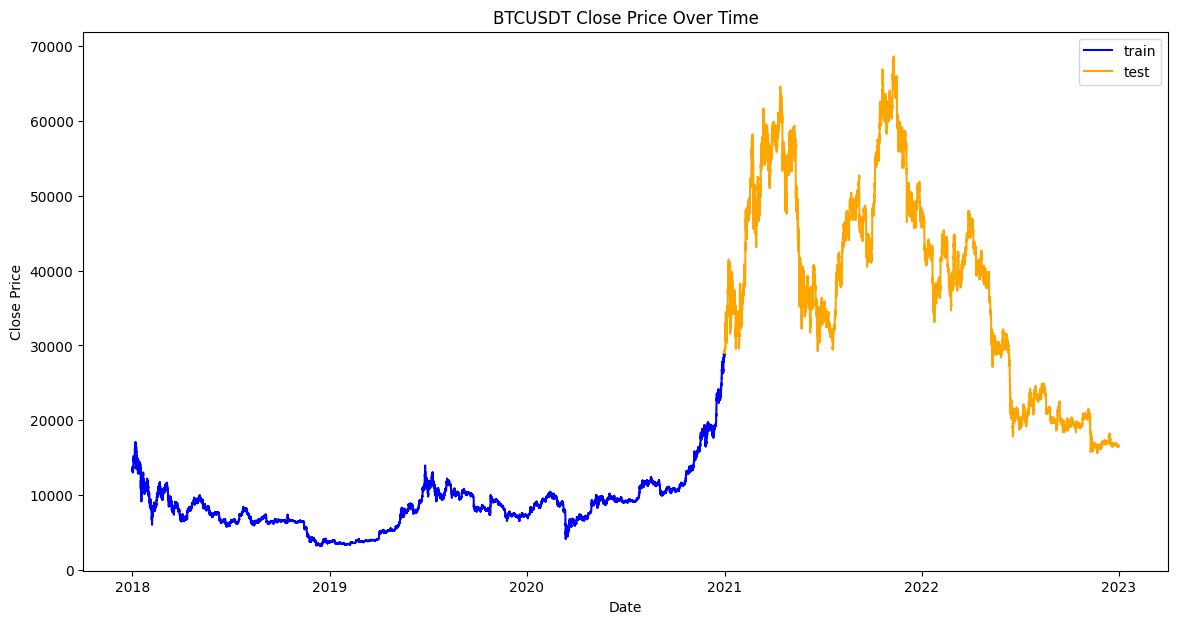

In [ ]:

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(btc_ohlc[btc_ohlc.index.year < 2021].index, btc_ohlc[btc_ohlc.index.year < 2021]['close'], color='blue', label='train')

ax.plot(btc_ohlc[btc_ohlc.index.year >= 2021].index, btc_ohlc[btc_ohlc.index.year >= 2021]['close'], color='orange', label='test')

ax.set_title('BTCUSDT Close Price Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')

ax.legend()

plt.show()


In [ ]:
print(f"Size of train data: {train_data.shape}")
print(f"Size of test data: {test_data.shape}")


Size of train data: (26303, 50)
Size of test data: (17519, 50)


In [ ]:
train_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'year_month_day', 'time',
       'month', 'time_seconds_x', 'max_return', 'today_return',
       'lag1_day_return', 'lag2_day_return', 'lag3_day_return',
       'lag4_day_return', 'lag5_day_return', 'RSI', 'ATR',
       'ATR_open_close_diff', 'CCI', 'CCI_above_100', 'CCI_below_100',
       '3hr_ma', '6hr_ma', '8hr_ma', '12hr_ma', '24hr_ma', '48hr_ma',
       '6hr_3hr_diff', '12hr_6hr_diff', '12hr_48hr_diff', '24hr_12hr_diff',
       '48hr_24hr_diff', '6hr_3hr_diff_negative', '12hr_6hr_diff_negative',
       '24hr_12hr_diff_negative', '48hr_24hr_diff_negative',
       '12hr_48hr_diff_negative', 'Support', 'Resistance', 'below_support',
       'above_resistance', 'Min_Close_12H',
       'Normalized_Close_Distance_From_Min_12H', 'RSI_Under_50',
       'RSI_Support_Signal', 'Return_per_Volume_Change', 'morning',
       'afternoon', 'evening'],
      dtype='object')

In [ ]:
train_data_raw = train_data.copy()
test_data_raw = test_data.copy()

# Normalization

In [ ]:
features_to_normalize = ['open', 'high', 'low', 'close', 'volume',
       'RSI', '3hr_ma', '6hr_ma',
       '8hr_ma', '12hr_ma', '24hr_ma', '48hr_ma', '6hr_3hr_diff',
       '12hr_6hr_diff', '24hr_12hr_diff', '48hr_24hr_diff',
       '6hr_3hr_diff_negative', '12hr_6hr_diff_negative',
       '24hr_12hr_diff_negative', '48hr_24hr_diff_negative','Support', 'Resistance', 'below_support',
       'above_resistance', 'Min_Close_12H',
       'Normalized_Close_Distance_From_Min_12H', 'RSI_Under_50',
       'RSI_Support_Signal', 'Return_per_Volume_Change', 'ATR',
        'ATR_open_close_diff', 'CCI', 'CCI_above_100', 'CCI_below_100', '12hr_48hr_diff', 'lag1_day_return', 'lag2_day_return',
        'lag3_day_return', 'lag4_day_return', 'lag5_day_return', 'today_return', 'morning', 'afternoon', 'evening']
for feature in features_to_normalize:
  max_value = train_data[feature].max()
  min_value = train_data[feature].min()
  train_data[feature] = (train_data[feature] - min_value) / (max_value - min_value)
  test_data[feature] = (test_data[feature] - min_value) / (max_value - min_value)

<ipython-input-74-84ffb0bc1774>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[feature] = (train_data[feature] - min_value) / (max_value - min_value)
<ipython-input-74-84ffb0bc1774>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[feature] = (test_data[feature] - min_value) / (max_value - min_value)


In [ ]:
train_data.reset_index(inplace=True)
test_data.reset_index(inplace=True)

In [ ]:
train_data.head()

,date_time_column,open,high,low,close,volume,year_month_day,time,month,time_seconds_x,...,below_support,above_resistance,Min_Close_12H,Normalized_Close_Distance_From_Min_12H,RSI_Under_50,RSI_Support_Signal,Return_per_Volume_Change,morning,afternoon,evening
0,2018-01-01 01:00:00,0.398544,0.398621,0.387420,0.386081,0.007889,2018-01-01,01:00:00,1,1.514768e+09,...,0.0,0.0,NaN,NaN,1.0,0.0,0.990284,1.0,0.0,0.0
1,2018-01-01 02:00:00,0.386064,0.391884,0.389197,0.390990,0.008812,2018-01-01,02:00:00,1,1.514772e+09,...,0.0,0.0,NaN,NaN,1.0,0.0,0.990340,1.0,0.0,0.0
2,2018-01-01 03:00:00,0.391019,0.399265,0.392669,0.393953,0.008649,2018-01-01,03:00:00,1,1.514776e+09,...,0.0,0.0,NaN,NaN,1.0,0.0,0.990243,1.0,0.0,0.0
3,2018-01-01 04:00:00,0.394878,0.399614,0.393810,0.401185,0.007022,2018-01-01,04:00:00,1,1.514779e+09,...,0.0,0.0,NaN,NaN,1.0,0.0,0.990222,1.0,0.0,0.0
4,2018-01-01 05:00:00,0.401826,0.402531,0.401792,0.399669,0.008310,2018-01-01,05:00:00,1,1.514783e+09,...,0.0,0.0,NaN,NaN,1.0,0.0,0.990236,1.0,0.0,0.0


- Drop categorical and unncessary columns for X train and test

In [ ]:
X_train = train_data.drop(columns=['date_time_column', 'year_month_day', 'time','time_seconds_x','max_return'])  # Features for training
Y_train = train_data['max_return']  # Target for training

X_test = test_data.drop(columns=['date_time_column', 'year_month_day', 'time','time_seconds_x','max_return'])  # Features for testing
Y_test = test_data['max_return']  # Target for testing

In [ ]:
X_train.columns

Index(['open', 'high', 'low', 'close', 'volume', 'month', 'today_return',
       'lag1_day_return', 'lag2_day_return', 'lag3_day_return',
       'lag4_day_return', 'lag5_day_return', 'RSI', 'ATR',
       'ATR_open_close_diff', 'CCI', 'CCI_above_100', 'CCI_below_100',
       '3hr_ma', '6hr_ma', '8hr_ma', '12hr_ma', '24hr_ma', '48hr_ma',
       '6hr_3hr_diff', '12hr_6hr_diff', '12hr_48hr_diff', '24hr_12hr_diff',
       '48hr_24hr_diff', '6hr_3hr_diff_negative', '12hr_6hr_diff_negative',
       '24hr_12hr_diff_negative', '48hr_24hr_diff_negative',
       '12hr_48hr_diff_negative', 'Support', 'Resistance', 'below_support',
       'above_resistance', 'Min_Close_12H',
       'Normalized_Close_Distance_From_Min_12H', 'RSI_Under_50',
       'RSI_Support_Signal', 'Return_per_Volume_Change', 'morning',
       'afternoon', 'evening'],
      dtype='object')

# Initial Model

- Build Initial Model

In [ ]:
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor



In [ ]:
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
xgb_model.fit(X_train, Y_train)

Y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Mean squared error:", rmse)

Mean squared error: 0.01646133971147205


In [ ]:
Predictions_Actual = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
print(Predictions_Actual.head(5))

     Actual  Predicted
0  0.014310   0.007057
1 -0.004470   0.004586
2  0.002873   0.009314
3 -0.001982   0.007779
4 -0.000624   0.008892


- Evaluate Feature Importance

In [ ]:
import pandas as pd
importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': xgb_model.feature_importances_}).sort_values('importance', ascending=False)
print(importance_df)


                                   feature  importance
18                                  3hr_ma    0.073770
3                                    close    0.064594
13                                     ATR    0.061985
21                                 12hr_ma    0.061295
14                     ATR_open_close_diff    0.052102
35                              Resistance    0.049212
28                          48hr_24hr_diff    0.045789
20                                  8hr_ma    0.043998
25                           12hr_6hr_diff    0.037055
22                                 24hr_ma    0.034033
19                                  6hr_ma    0.032079
0                                     open    0.028604
23                                 48hr_ma    0.027825
34                                 Support    0.026814
7                          lag1_day_return    0.024325
41                      RSI_Support_Signal    0.024067
2                                      low    0.020721
38        

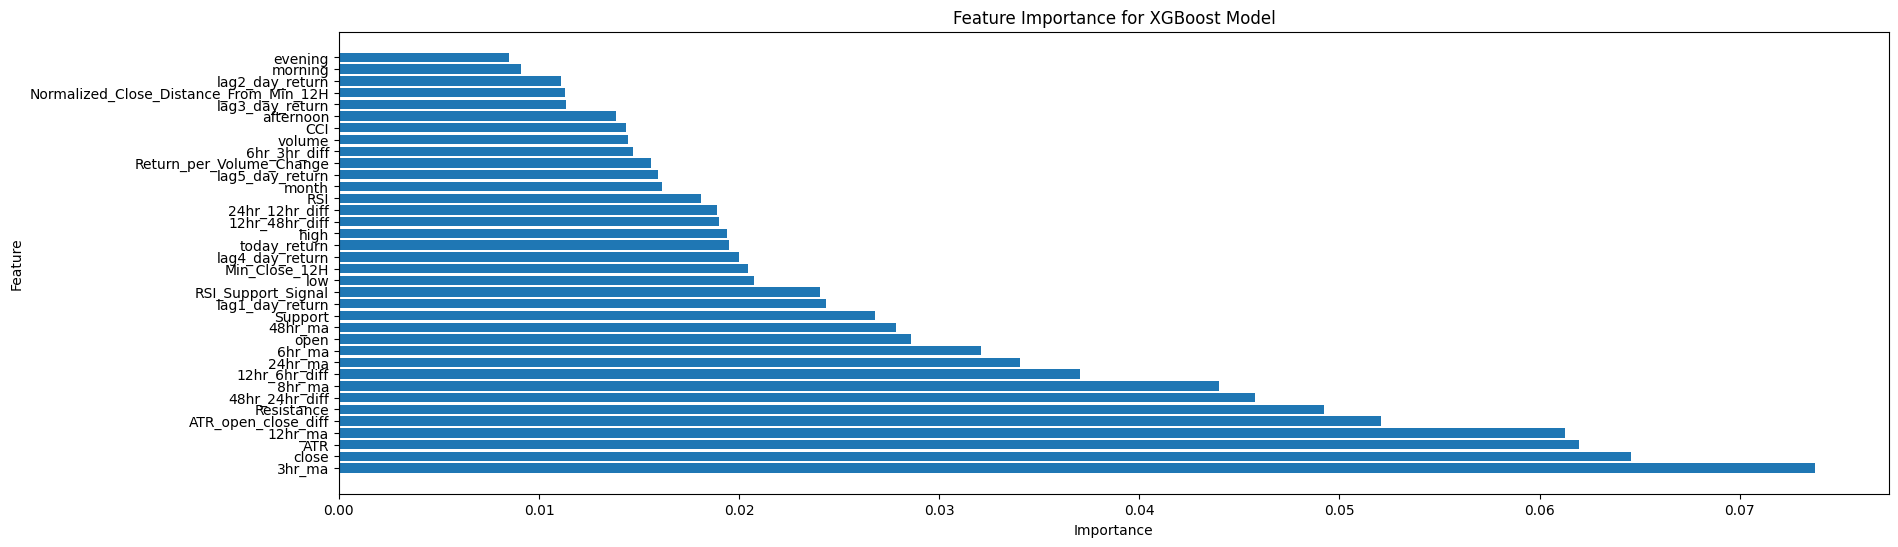

In [ ]:
import matplotlib.pyplot as plt

important_features = importance_df[importance_df['importance'] > 0]

plt.figure(figsize=(20, 6))
plt.barh(important_features['feature'], important_features['importance'])
plt.title('Feature Importance for XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
importance_df

,feature,importance
18,3hr_ma,0.073770
3,close,0.064594
13,ATR,0.061985
21,12hr_ma,0.061295
14,ATR_open_close_diff,0.052102
35,Resistance,0.049212
28,48hr_24hr_diff,0.045789
20,8hr_ma,0.043998
25,12hr_6hr_diff,0.037055
22,24hr_ma,0.034033


# Feature Reduction

In [ ]:
important_features = importance_df[importance_df['importance'] > 0.01]['feature'].to_list()

In [ ]:
X_train = X_train[important_features]
X_test = X_test[important_features]

#Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.2, 0.3]
}

xgb_model = XGBRegressor()

grid_search = GridSearchCV(xgb_model, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train, Y_train)
Y_pred_test = best_model.predict(X_test)
Y_pred_train = best_model.predict(X_train)

r2_train = best_model.score(X_train, Y_train)
r2_test = best_model.score(X_test, Y_test)
mse_test = mean_squared_error(Y_test, Y_pred_test)
mse_train = mean_squared_error(Y_train, Y_pred_train)

print("R^2 on train:", r2_train)
print("R^2 on test:", r2_test)
print("Mean squared error Train:", mse_train)
print("Mean squared error Train:", mse_test)
print("Best parameters:", grid_search.best_params_)


R^2 on train: 0.19569017177508896
R^2 on test: -0.06252305045729134
Mean squared error Train: 0.0001592018704472536
Mean squared error Train: 0.00013219451832963513
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [ ]:

cv_results = grid_search.cv_results_

# Create a dataframe from the results
cv_df = pd.DataFrame(cv_results)

In [ ]:
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.129889,0.674135,0.020619,0.007663,0.1,3,100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",-1.974899,0.051339,0.070909,0.007111,-0.086129,-0.386334,0.796127,2
1,0.936343,0.041437,0.023254,0.003966,0.1,3,200,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",-2.821984,0.043789,0.068237,-0.003326,-0.066749,-0.556007,1.133924,7
2,1.776863,0.803441,0.031076,0.009725,0.1,3,300,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",-3.454119,0.009726,0.064668,-0.004959,-0.087582,-0.694453,1.380694,9
3,0.727345,0.025447,0.017610,0.001265,0.1,4,100,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",-1.977992,0.018520,0.062060,0.011946,-0.072438,-0.391581,0.794400,3
4,1.716033,0.931163,0.028474,0.007315,0.1,4,200,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",-2.478077,-0.045545,0.041802,-0.022716,-0.068903,-0.514688,0.982388,6
5,2.136346,0.634421,0.038585,0.010306,0.1,4,300,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",-4.115962,-0.084424,0.019549,-0.037351,-0.080633,-0.859764,1.628532,12
6,1.090383,0.200820,0.023519,0.003713,0.1,5,100,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",-1.306252,0.021322,0.061293,-0.018322,-0.094899,-0.267372,0.521998,1
7,2.209699,0.778403,0.042581,0.022622,0.1,5,200,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",-1.951309,-0.023797,0.029575,-0.049326,-0.129169,-0.424805,0.764966,4
8,3.033365,0.700394,0.052113,0.022342,0.1,5,300,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",-3.210583,-0.083494,0.019711,-0.074130,-0.164707,-0.702640,1.255333,10
9,0.558042,0.041421,0.015899,0.001202,0.2,3,100,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",-2.266447,0.016425,0.076944,-0.005268,-0.077830,-0.451235,0.908954,5


In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [2,3,4,5],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [0.01, 0.05, 0.1,],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


results = []

for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for min_child_weight in param_grid['min_child_weight']:
            for learning_rate in param_grid['learning_rate']:
                for subsample in param_grid['subsample']:
                    for colsample_bytree in param_grid['colsample_bytree']:

                        xgb_reg = XGBRegressor(
                            n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_child_weight=min_child_weight,
                            learning_rate=learning_rate,
                            subsample=subsample,
                            colsample_bytree=colsample_bytree
                        )


                        xgb_reg.fit(X_train, Y_train)


                        train_predictions = xgb_reg.predict(X_train)
                        test_predictions = xgb_reg.predict(X_test)


                        train_rmse = np.sqrt(mean_squared_error(Y_train, train_predictions))
                        test_rmse = np.sqrt(mean_squared_error(Y_test, test_predictions))
                        test_residuals = Y_test - test_predictions
                        train_residuals = Y_train - train_predictions



                        results.append({
                            'N_estimators': n_estimators,
                            'Max_depth': max_depth,
                            'Min_child_weight': min_child_weight,
                            'Learning_rate': learning_rate,
                            'Subsample': subsample,
                            'Colsample_bytree': colsample_bytree,
                            'Model R2 on Train': xgb_reg.score(X_train, Y_train),
                            'Model R2 on Test': xgb_reg.score(X_test, Y_test),
                            'Root Mean Squared Error on Train': train_rmse,
                            'Root Mean Squared Error on Test': test_rmse,
                            'Train Residuals': train_residuals,
                            'Test Residuals': test_residuals
                        })


results_df = pd.DataFrame(results)


print(results_df)

     N_estimators  Max_depth  Min_child_weight  Learning_rate  Subsample  \
0              50          2                 1           0.01        0.8   
1              50          2                 1           0.01        0.8   
2              50          2                 1           0.01        1.0   
3              50          2                 1           0.01        1.0   
4              50          2                 1           0.05        0.8   
..            ...        ...               ...            ...        ...   
571           200          5                 5           0.05        1.0   
572           200          5                 5           0.10        0.8   
573           200          5                 5           0.10        0.8   
574           200          5                 5           0.10        1.0   
575           200          5                 5           0.10        1.0   

     Colsample_bytree  Model R2 on Train  Model R2 on Test  \
0                 0.8    

In [ ]:
results_df

,N_estimators,Max_depth,Min_child_weight,Learning_rate,Subsample,Colsample_bytree,Model R2 on Train,Model R2 on Test,Root Mean Squared Error on Train,Root Mean Squared Error on Test,Train Residuals,Test Residuals
0,50,2,1,0.01,0.8,0.8,0.046371,-0.012527,0.013498,0.013216,0 0.033924 1 0.024003 2 0...,0 0.005596 1 -0.012525 2 -0...
1,50,2,1,0.01,0.8,1.0,0.046375,-0.029788,0.013498,0.013328,0 0.034210 1 0.024440 2 0...,0 0.005355 1 -0.012872 2 -0...
2,50,2,1,0.01,1.0,0.8,0.045774,-0.020522,0.013502,0.013268,0 0.034791 1 0.024992 2 0...,0 0.005627 1 -0.012531 2 -0...
3,50,2,1,0.01,1.0,1.0,0.045318,-0.046311,0.013505,0.013435,0 0.034984 1 0.025001 2 0...,0 0.005297 1 -0.012938 2 -0...
4,50,2,1,0.05,0.8,0.8,0.119901,-0.280736,0.012967,0.014864,0 0.020242 1 0.015751 2 0...,0 0.004010 1 -0.013216 2 -0...
...,...,...,...,...,...,...,...,...,...,...,...,...
571,200,5,5,0.05,1.0,1.0,0.422665,-0.443484,0.010502,0.015780,0 0.002202 1 0.001372 2 0...,0 0.006246 1 -0.009359 2 -0...
572,200,5,5,0.10,0.8,0.8,0.519199,-0.739363,0.009584,0.017322,0 0.000589 1 -0.002172 2 0...,0 0.006550 1 -0.007944 2 -0...
573,200,5,5,0.10,0.8,1.0,0.528377,-0.778515,0.009492,0.017516,0 0.000686 1 -0.000786 2 0...,0 0.011770 1 -0.002837 2 0...
574,200,5,5,0.10,1.0,0.8,0.532185,-0.770159,0.009454,0.017474,0 -0.000122 1 0.000248 2 0...,0 0.010253 1 -0.002719 2 -0...


In [ ]:
sorted_results_df = results_df.sort_values(by='Model R2 on Test', ascending=False)


In [ ]:
sorted_results_df.head(50)

,N_estimators,Max_depth,Min_child_weight,Learning_rate,Subsample,Colsample_bytree,Model R2 on Train,Model R2 on Test,Root Mean Squared Error on Train,Root Mean Squared Error on Test,Train Residuals,Test Residuals
134,50,5,5,0.01,1.0,0.8,0.106941,0.017427,0.013062,0.013019,0 0.033865 1 0.023840 2 0...,0 0.006074 1 -0.012064 2 -0...
86,50,4,3,0.01,1.0,0.8,0.087732,0.017001,0.013202,0.013022,0 0.034019 1 0.024081 2 0...,0 0.005804 1 -0.012114 2 -0...
98,50,4,5,0.01,1.0,0.8,0.087414,0.016814,0.013204,0.013023,0 0.033988 1 0.024050 2 0...,0 0.005850 1 -0.012130 2 -0...
74,50,4,1,0.01,1.0,0.8,0.087756,0.016607,0.013201,0.013024,0 0.034052 1 0.024114 2 0...,0 0.005832 1 -0.012119 2 -0...
135,50,5,5,0.01,1.0,1.0,0.108931,0.016111,0.013047,0.013028,0 0.034094 1 0.023838 2 0...,0 0.005870 1 -0.012605 2 -0...
122,50,5,3,0.01,1.0,0.8,0.108146,0.015529,0.013053,0.013032,0 0.033765 1 0.023775 2 0...,0 0.006015 1 -0.012112 2 -0...
110,50,5,1,0.01,1.0,0.8,0.109140,0.015147,0.013046,0.013034,0 0.033903 1 0.023914 2 0...,0 0.005965 1 -0.012166 2 -0...
120,50,5,3,0.01,0.8,0.8,0.105740,0.014811,0.013071,0.013036,0 0.030413 1 0.021554 2 0...,0 0.006052 1 -0.012162 2 -0...
132,50,5,5,0.01,0.8,0.8,0.104082,0.014733,0.013083,0.013037,0 0.030514 1 0.020946 2 0...,0 0.006064 1 -0.012161 2 -0...
108,50,5,1,0.01,0.8,0.8,0.106169,0.014438,0.013068,0.013039,0 0.030897 1 0.021591 2 0...,0 0.006040 1 -0.012172 2 -0...


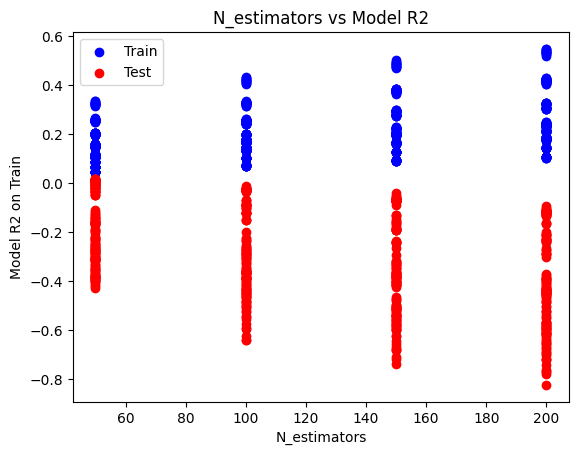

In [ ]:
plt.scatter(results_df['N_estimators'], results_df['Model R2 on Train'], color='blue')
plt.scatter(results_df['N_estimators'], results_df['Model R2 on Test'], color='red')
plt.xlabel('N_estimators')
plt.ylabel('Model R2 on Train')
plt.legend(['Train', 'Test'])
plt.title('N_estimators vs Model R2')
plt.show()

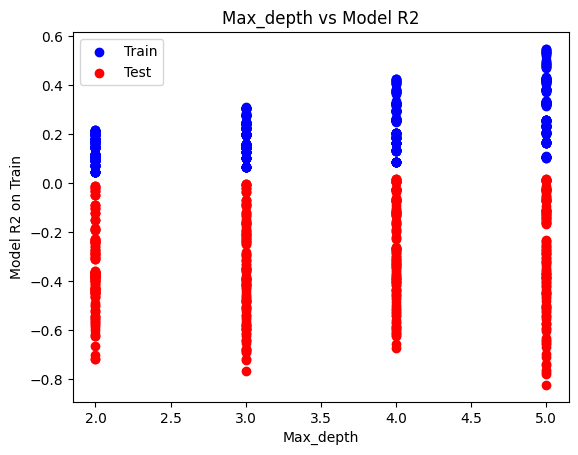

In [ ]:
plt.scatter(results_df['Max_depth'], results_df['Model R2 on Train'], color='blue')
plt.scatter(results_df['Max_depth'], results_df['Model R2 on Test'], color='red')
plt.xlabel('Max_depth')
plt.ylabel('Model R2 on Train')
plt.legend(['Train', 'Test'])
plt.title('Max_depth vs Model R2')
plt.show()

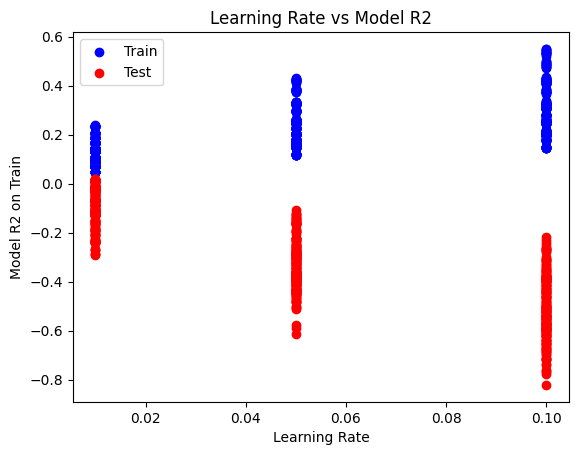

In [ ]:
plt.scatter(results_df['Learning_rate'], results_df['Model R2 on Train'], color='blue')
plt.scatter(results_df['Learning_rate'], results_df['Model R2 on Test'], color='red')
plt.xlabel('Learning Rate')
plt.ylabel('Model R2 on Train')
plt.legend(['Train', 'Test'])
plt.title('Learning Rate vs Model R2')
plt.show()

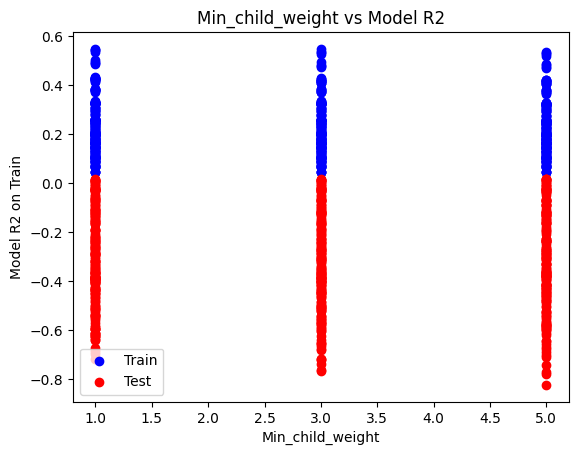

In [ ]:
plt.scatter(results_df['Min_child_weight'], results_df['Model R2 on Train'], color='blue')
plt.scatter(results_df['Min_child_weight'], results_df['Model R2 on Test'], color='red')
plt.xlabel('Min_child_weight')
plt.ylabel('Model R2 on Train')
plt.legend(['Train', 'Test'])
plt.title('Min_child_weight vs Model R2')
plt.show()

In [ ]:
print(results_df['Model R2 on Train'].max())

0.5495052312255451


In [ ]:
print(results_df['Model R2 on Test'].max())

0.017426829135525845


In [ ]:
best_row = results_df.loc[(results_df['Root Mean Squared Error on Train'] - results_df['Root Mean Squared Error on Test']).abs().argsort()[0]]
print(best_row)

N_estimators                                                                       50
Max_depth                                                                           5
Min_child_weight                                                                    3
Learning_rate                                                                    0.01
Subsample                                                                         1.0
Colsample_bytree                                                                  1.0
Model R2 on Train                                                            0.109759
Model R2 on Test                                                             0.012567
Root Mean Squared Error on Train                                             0.013041
Root Mean Squared Error on Test                                              0.013051
Train Residuals                     0        0.034482
1        0.024416
2        0...
Test Residuals                      0        0.005809


# Final Model

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
xgb_model_final = xgb.XGBRegressor(n_estimators=50, max_depth=5, min_child_weight=3, learning_rate=0.01, subsample=1, colsample_bytree=1)
xgb_model_final.fit(X_train, Y_train)

Y_pred_test = xgb_model_final.predict(X_test)
Y_pred_train = xgb_model_final.predict(X_train)





r2_train = xgb_model_final.score(X_train, Y_train)
r2_test = xgb_model_final.score(X_test, Y_test)
mse_test = mean_squared_error(Y_test, Y_pred_test)
mse_train = mean_squared_error(Y_train, Y_pred_train)


mse = mean_squared_error(Y_test, Y_pred_test)
print("R^2 on train:", r2_train)
print("R^2 on test:", r2_test)
print("Mean squared error Train:", mse_train)
print("Mean squared error Train:", mse_test)

R^2 on train: 0.10975944140219451
R^2 on test: 0.012566655116595271
Mean squared error Train: 0.00017007594008969476
Mean squared error Train: 0.00017033414714081007


# Strategy

In [ ]:
Y_pred_test.size

17519

In [ ]:
test_data_raw

,open,high,low,close,volume,year_month_day,time,month,time_seconds_x,max_return,...,below_support,above_resistance,Min_Close_12H,Normalized_Close_Distance_From_Min_12H,RSI_Under_50,RSI_Support_Signal,Return_per_Volume_Change,morning,afternoon,evening
date_time_column,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,28923.675657,29031.050961,28690.059633,28994.977931,2398.020634,2021-01-01,00:00:00,1,1.609459e+09,0.014310,...,0,0,28371.433293,0.104213,0,0,-0.004327,1,0,0
2021-01-01 01:00:00,28995.001153,29469.984770,28960.293648,29409.898924,5572.818325,2021-01-01,01:00:00,1,1.609463e+09,-0.004470,...,0,1,28371.433293,0.173559,0,0,0.011271,1,0,0
2021-01-01 02:00:00,29409.968094,29465.165442,29120.179959,29194.552831,2455.453331,2021-01-01,02:00:00,1,1.609466e+09,0.002873,...,0,0,28380.766213,0.136008,0,0,-0.011522,1,0,0
2021-01-01 03:00:00,29195.187648,29366.453421,29150.072535,29278.429186,1501.175679,2021-01-01,03:00:00,1,1.609470e+09,-0.001982,...,0,0,28380.766213,0.150027,0,0,-0.009952,1,0,0
2021-01-01 04:00:00,29278.447263,29394.542823,29030.301829,29220.384839,2103.928141,2021-01-01,04:00:00,1,1.609474e+09,-0.000624,...,0,0,28571.949850,0.108373,0,0,-0.005066,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 18:00:00,16581.436089,16589.323978,16571.783893,16577.749146,3390.449783,2022-12-31,18:00:00,12,1.672510e+09,-0.000460,...,0,0,16544.294314,0.005591,0,0,0.001229,0,0,1
2022-12-31 19:00:00,16577.716287,16589.996745,16565.164171,16570.118457,4139.299329,2022-12-31,19:00:00,12,1.672513e+09,-0.000092,...,0,0,16544.294314,0.004316,0,0,-0.000839,0,0,1
2022-12-31 20:00:00,16570.120747,16574.925554,16564.125024,16568.597952,2676.973597,2022-12-31,20:00:00,12,1.672517e+09,-0.001226,...,0,0,16544.294314,0.004062,1,0,0.000339,0,0,1


In [ ]:
test_data_raw['predictions'] = Y_pred_test

In [ ]:
test_data_raw

,open,high,low,close,volume,year_month_day,time,month,time_seconds_x,max_return,...,above_resistance,Min_Close_12H,Normalized_Close_Distance_From_Min_12H,RSI_Under_50,RSI_Support_Signal,Return_per_Volume_Change,morning,afternoon,evening,predictions
date_time_column,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,28923.675657,29031.050961,28690.059633,28994.977931,2398.020634,2021-01-01,00:00:00,1,1.609459e+09,0.014310,...,0,28371.433293,0.104213,0,0,-0.004327,1,0,0,0.008501
2021-01-01 01:00:00,28995.001153,29469.984770,28960.293648,29409.898924,5572.818325,2021-01-01,01:00:00,1,1.609463e+09,-0.004470,...,1,28371.433293,0.173559,0,0,0.011271,1,0,0,0.008158
2021-01-01 02:00:00,29409.968094,29465.165442,29120.179959,29194.552831,2455.453331,2021-01-01,02:00:00,1,1.609466e+09,0.002873,...,0,28380.766213,0.136008,0,0,-0.011522,1,0,0,0.009631
2021-01-01 03:00:00,29195.187648,29366.453421,29150.072535,29278.429186,1501.175679,2021-01-01,03:00:00,1,1.609470e+09,-0.001982,...,0,28380.766213,0.150027,0,0,-0.009952,1,0,0,0.008501
2021-01-01 04:00:00,29278.447263,29394.542823,29030.301829,29220.384839,2103.928141,2021-01-01,04:00:00,1,1.609474e+09,-0.000624,...,0,28571.949850,0.108373,0,0,-0.005066,1,0,0,0.009369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 18:00:00,16581.436089,16589.323978,16571.783893,16577.749146,3390.449783,2022-12-31,18:00:00,12,1.672510e+09,-0.000460,...,0,16544.294314,0.005591,0,0,0.001229,0,0,1,0.005910
2022-12-31 19:00:00,16577.716287,16589.996745,16565.164171,16570.118457,4139.299329,2022-12-31,19:00:00,12,1.672513e+09,-0.000092,...,0,16544.294314,0.004316,0,0,-0.000839,0,0,1,0.005910
2022-12-31 20:00:00,16570.120747,16574.925554,16564.125024,16568.597952,2676.973597,2022-12-31,20:00:00,12,1.672517e+09,-0.001226,...,0,16544.294314,0.004062,1,0,0.000339,0,0,1,0.005910


In [ ]:
test_data_raw['buy_signal'] = (test_data_raw['predictions'] >= 0.015).astype(int)

Bought at 34905.318951044705 on 2021-01-11 05:00:00
Sold at 32870.56459833326 on 2021-01-11 06:00:00 (Stop_Loss)
Bought at 34375.016284869314 on 2021-01-11 07:00:00
Sold at 35430.248918227975 on 2021-01-11 08:00:00 (Take_Profit)
Bought at 34275.54422460477 on 2021-01-11 12:00:00
Sold at 32813.858644104075 on 2021-01-11 13:00:00 (Stop_Loss)
Bought at 33298.92821386026 on 2021-01-11 14:00:00
Sold at 31578.518341215007 on 2021-01-11 15:00:00 (Stop_Loss)
Bought at 31776.87944902909 on 2021-01-11 16:00:00
Sold at 32839.64226644951 on 2021-01-11 17:00:00 (Take_Profit)
Bought at 32561.82046297746 on 2021-01-11 18:00:00
Sold at 33967.44517035936 on 2021-01-11 21:00:00 (Take_Profit)
Bought at 33291.05757354592 on 2021-01-12 13:00:00
Sold at 34998.5550203467 on 2021-01-12 16:00:00 (Take_Profit)
Bought at 32304.747341281363 on 2021-01-21 13:00:00
Sold at 31180.52192283875 on 2021-01-21 14:00:00 (Stop_Loss)
Bought at 31083.18434169519 on 2021-01-21 16:00:00
Sold at 32468.951672253697 on 2021-01-21

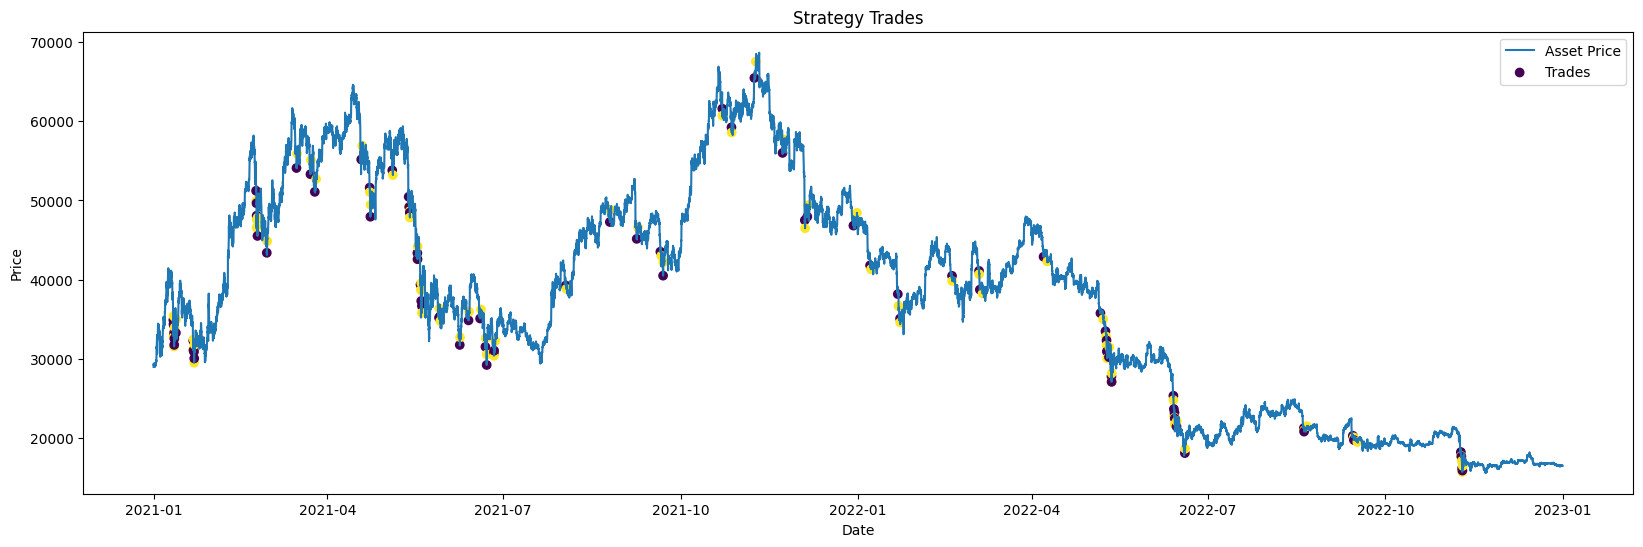

In [ ]:

cash_balance = 10000

stop_loss = -0.01
take_profit = 0.03

position = 0
pnl = 0

trades = []

for date, row in test_data_raw.iterrows():
    if row['buy_signal'] == 1 and position == 0:

        buy_price = row['close']
        position = 1
        trades.append([date, "Buy", buy_price, "Buy"])
        print(f"Bought at {buy_price} on {date}")

    if position == 1:
        current_price = row['close']
        if (current_price / buy_price - 1) <= stop_loss:

            sell_price = current_price
            position = 0
            pnl -= abs(sell_price - buy_price)
            trades.append([date, "Sell", sell_price, "Stop_Loss"])
            print(f"Sold at {sell_price} on {date} (Stop_Loss)")

        elif (current_price / buy_price - 1) >= take_profit:

            sell_price = current_price
            position = 0
            pnl += sell_price - buy_price
            trades.append([date, "Sell", sell_price, "Take_Profit"])
            print(f"Sold at {sell_price} on {date} (Take_Profit)")

# Calculate the final cash balance
final_cash_balance = cash_balance + pnl

# Print the results
print(f"Final Cash Balance: {final_cash_balance}")

# Create a DataFrame of trades
trades_df = pd.DataFrame(trades, columns=["Date", "Action", "Price", "Reason"])
trades_df['Color'] = trades_df['Reason'].apply(lambda x: 1 if x == 'Take_Profit' else 0)
print(trades_df)



# Plot the performance of the strategy vs the asset
plt.figure(figsize=(20,6))
plt.plot(test_data_raw.index, test_data_raw['close'], label="Asset Price")
plt.scatter(trades_df["Date"], trades_df["Price"],c=trades_df["Action"].astype('category').cat.codes, cmap="viridis", label="Trades")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Strategy Trades")
plt.legend()
plt.show()

In [ ]:
trades_df

,Date,Action,Price,Reason,Color
0,2021-01-11 05:00:00,Buy,34905.318951,Buy,0
1,2021-01-11 06:00:00,Sell,32870.564598,Stop_Loss,0
2,2021-01-11 07:00:00,Buy,34375.016285,Buy,0
3,2021-01-11 08:00:00,Sell,35430.248918,Take_Profit,1
4,2021-01-11 12:00:00,Buy,34275.544225,Buy,0
...,...,...,...,...,...
155,2022-11-09 15:00:00,Sell,17116.846367,Stop_Loss,0
156,2022-11-09 20:00:00,Buy,16239.110453,Buy,0
157,2022-11-09 21:00:00,Sell,15752.020309,Stop_Loss,0
158,2022-11-09 23:00:00,Buy,15922.781663,Buy,0


In [ ]:
# prompt: calculate a column for return where if action is sell, take that rows price, minus the price before divided by the price before

import numpy as np
trades_df['return'] = np.where(trades_df['Action'] == 'Sell', (trades_df['Price'] - trades_df['Price'].shift(1)) / trades_df['Price'].shift(1), np.nan)


In [ ]:
trades_df['trading_fee'] = 0.002

In [ ]:
trades_df['return_net_fees'] = trades_df['return'] - trades_df['trading_fee']

In [ ]:
print("Return Sum:",trades_df['return'].sum())


Return Sum: 0.26308513237588405


In [ ]:
print("Return Net Fees:",trades_df['return_net_fees'].sum())

Return Net Fees: 0.10308513237588404


In [ ]:
trades_df['return'].fillna(0, inplace=True)


In [ ]:
trades_df['return_net_fees'].fillna(0, inplace=True)

In [ ]:
test_data_raw['actual_return'] = (test_data_raw['close'] - test_data_raw['close'].shift(-1)) / test_data_raw['close'].shift(-1)

In [ ]:
trades_df.set_index('Date', inplace=True)

KeyError: "None of ['Date'] are in the columns"

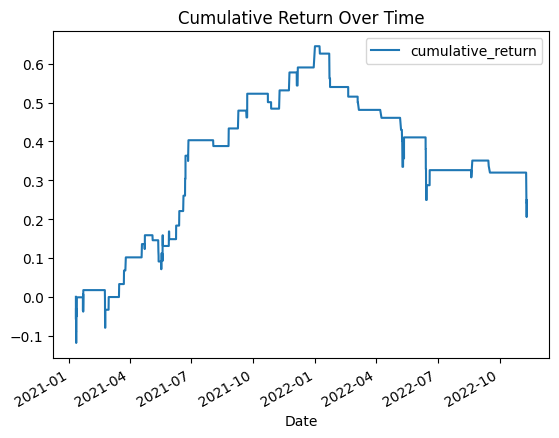

In [ ]:
trades_df['cumulative_return'] = np.exp(np.log1p(trades_df['return']).cumsum())-1
trades_df[['cumulative_return']].plot()
plt.title('Cumulative Return Over Time')
plt.show()


In [ ]:
trades_df['cumulative_return_net_fees'] = np.exp(np.log1p(trades_df['return_net_fees']).cumsum())-1

In [ ]:
trades_df

,Action,Price,Reason,Color,return,trading_fee,return_net_fees,cumulative_return,cumulative_return_net_fees
Date,,,,,,,,,
2021-01-11 05:00:00,Buy,34905.318951,Buy,0,0.000000,0.002,0.000000,0.000000,0.000000
2021-01-11 06:00:00,Sell,32870.564598,Stop_Loss,0,-0.058294,0.002,-0.060294,-0.058294,-0.060294
2021-01-11 07:00:00,Buy,34375.016285,Buy,0,0.000000,0.002,0.000000,-0.058294,-0.060294
2021-01-11 08:00:00,Sell,35430.248918,Take_Profit,1,0.030698,0.002,0.028698,-0.029385,-0.033326
2021-01-11 12:00:00,Buy,34275.544225,Buy,0,0.000000,0.002,0.000000,-0.029385,-0.033326
...,...,...,...,...,...,...,...,...,...
2022-11-09 15:00:00,Sell,17116.846367,Stop_Loss,0,-0.032360,0.002,-0.034360,0.242785,0.063489
2022-11-09 20:00:00,Buy,16239.110453,Buy,0,0.000000,0.002,0.000000,0.242785,0.063489
2022-11-09 21:00:00,Sell,15752.020309,Stop_Loss,0,-0.029995,0.002,-0.031995,0.205508,0.029463


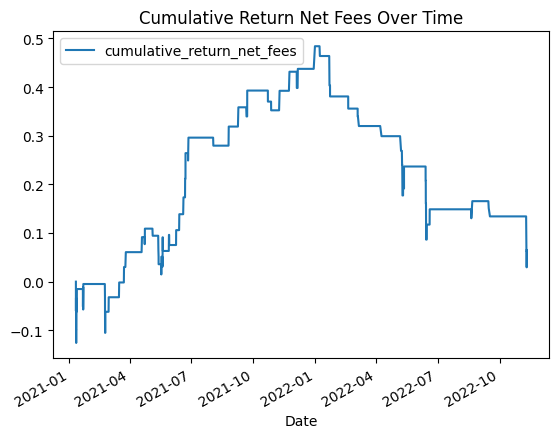

In [ ]:
trades_df[['cumulative_return_net_fees']].plot()
plt.title('Cumulative Return Net Fees Over Time')
plt.show()

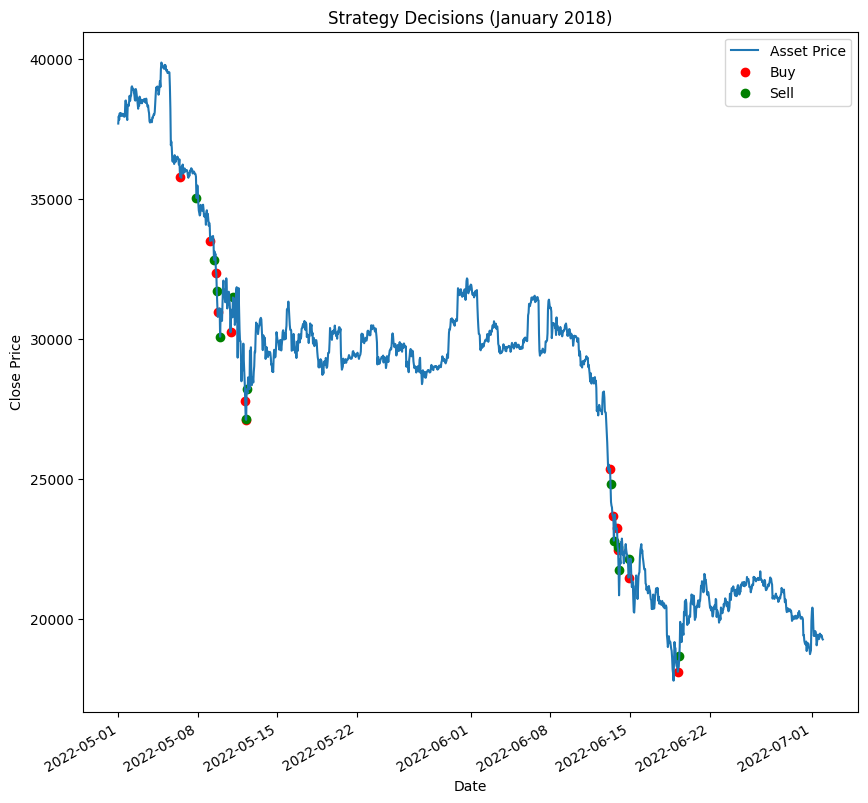

In [ ]:
import matplotlib.pyplot as plt
test_data_raw_june = test_data_raw['2022-05-01':'2022-07-01']
trades_data_raw_june = trades_df['2022-05-01':'2022-07-01']

plt.figure(figsize=(10, 10))
plt.plot(test_data_raw_june.index, test_data_raw_june['close'], label="Asset Price")


plt.scatter(trades_data_raw_june[trades_data_raw_june['Action'] == 'Buy'].index, trades_data_raw_june[trades_data_raw_june['Action'] == 'Buy'].Price, color='red', label="Buy")
plt.scatter(trades_data_raw_june[trades_data_raw_june['Action'] == 'Sell'].index, trades_data_raw_june[trades_data_raw_june['Action'] == 'Sell'].Price, color='green', label="Sell")


plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Strategy Decisions (January 2018)")

plt.legend()
plt.gcf().autofmt_xdate()

plt.show()

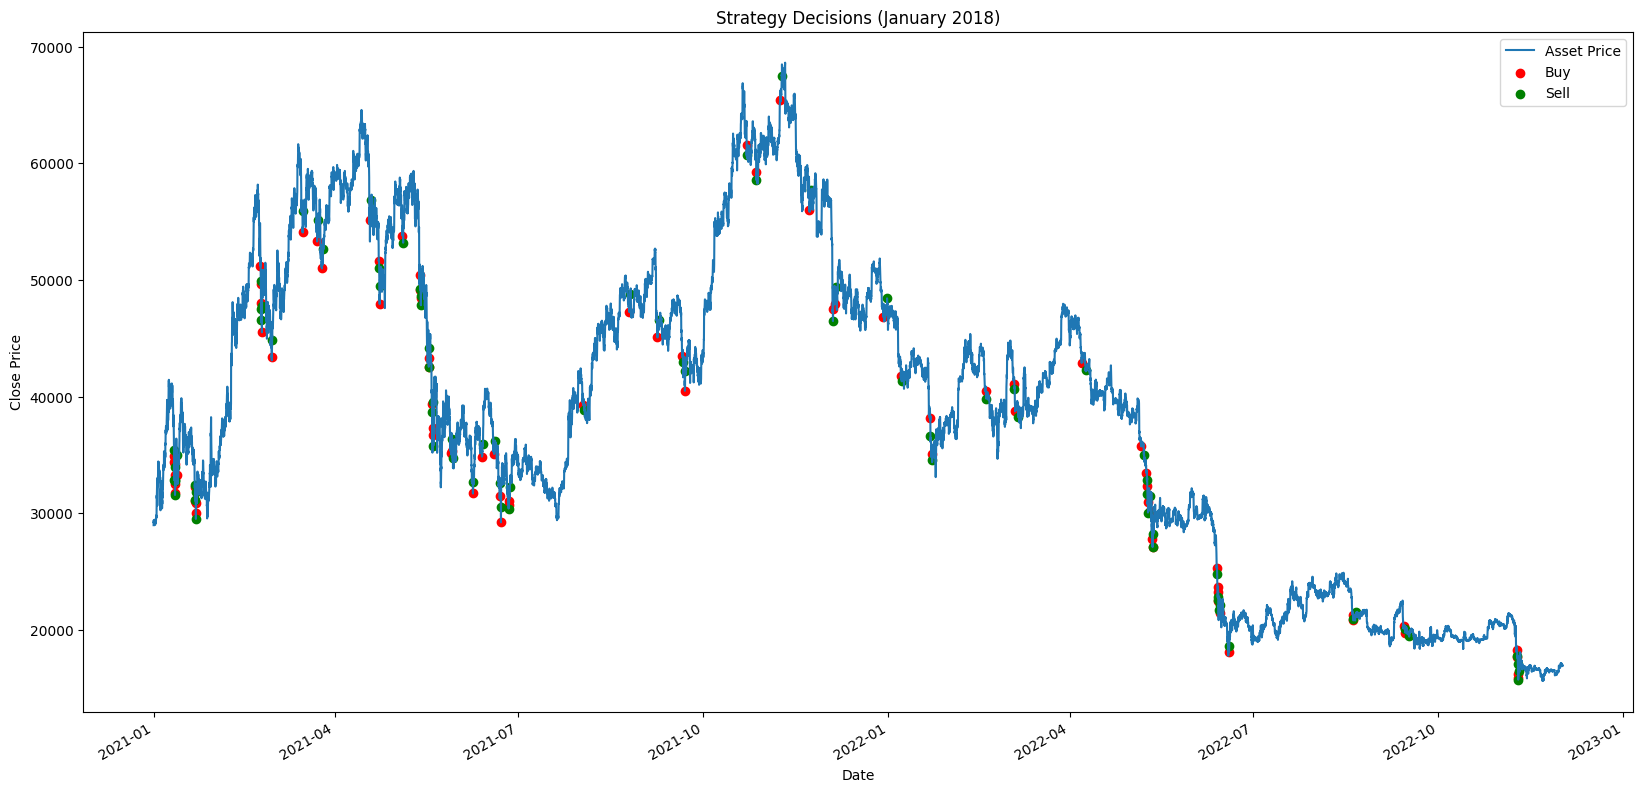

In [ ]:
import matplotlib.pyplot as plt
test_data_raw_june = test_data_raw['2021-01-01':'2022-12-01']
trades_data_raw_june = trades_df['2021-01-01':'2022-12-01']

plt.figure(figsize=(20, 10))
plt.plot(test_data_raw_june.index, test_data_raw_june['close'], label="Asset Price")


plt.scatter(trades_data_raw_june[trades_data_raw_june['Action'] == 'Buy'].index, trades_data_raw_june[trades_data_raw_june['Action'] == 'Buy'].Price, color='red', label="Buy")
plt.scatter(trades_data_raw_june[trades_data_raw_june['Action'] == 'Sell'].index, trades_data_raw_june[trades_data_raw_june['Action'] == 'Sell'].Price, color='green', label="Sell")


plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Strategy Decisions (January 2018)")

plt.legend()
plt.gcf().autofmt_xdate()

plt.show()

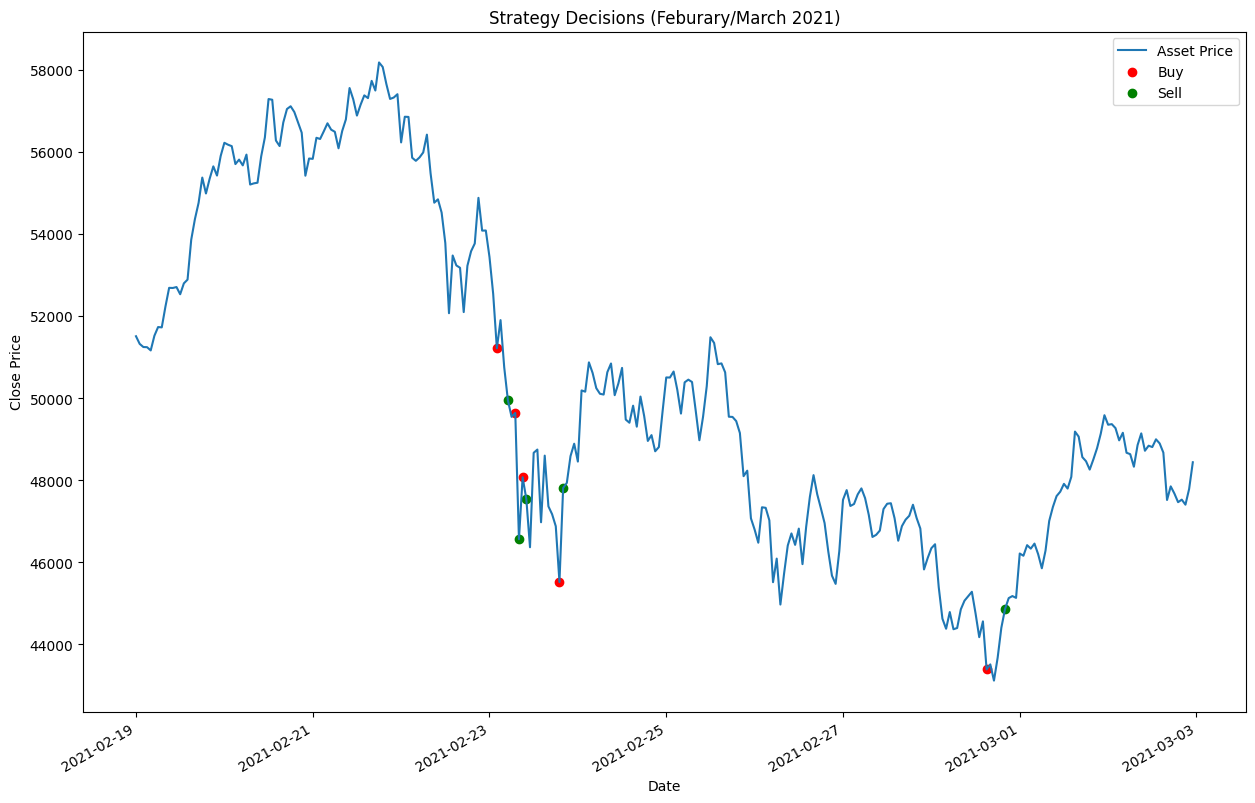

In [ ]:
import matplotlib.pyplot as plt
test_data_raw_june = test_data_raw['2021-02-19':'2021-03-02']
trades_data_raw_june = trades_df['2021-02-19':'2021-03-02']

plt.figure(figsize=(15, 10))
plt.plot(test_data_raw_june.index, test_data_raw_june['close'], label="Asset Price")


plt.scatter(trades_data_raw_june[trades_data_raw_june['Action'] == 'Buy'].index, trades_data_raw_june[trades_data_raw_june['Action'] == 'Buy'].Price, color='red', label="Buy")
plt.scatter(trades_data_raw_june[trades_data_raw_june['Action'] == 'Sell'].index, trades_data_raw_june[trades_data_raw_june['Action'] == 'Sell'].Price, color='green', label="Sell")


plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Strategy Decisions (Feburary/March 2021)")

plt.legend()
plt.gcf().autofmt_xdate()

plt.show()

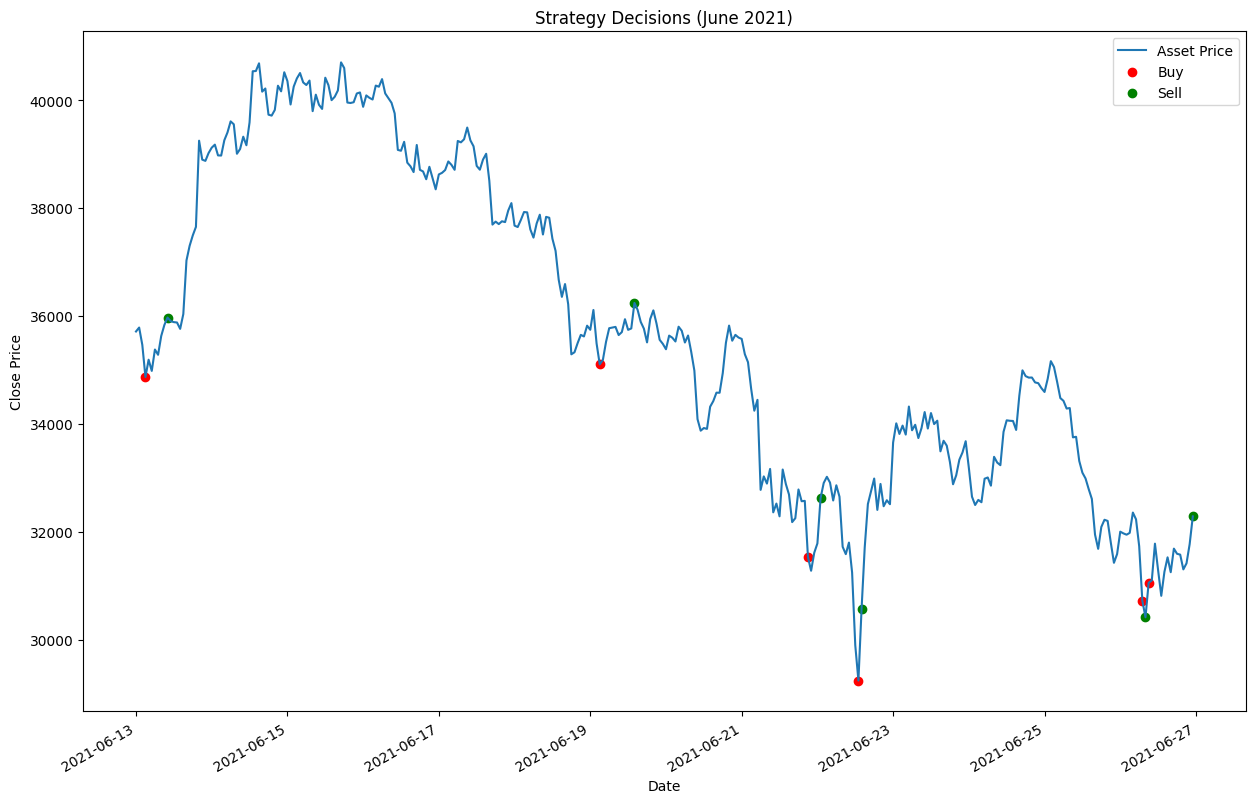

In [ ]:
import matplotlib.pyplot as plt
test_data_raw_june = test_data_raw['2021-06-13':'2021-06-26']
trades_data_raw_june = trades_df['2021-06-13':'2021-06-26']

plt.figure(figsize=(15, 10))
plt.plot(test_data_raw_june.index, test_data_raw_june['close'], label="Asset Price")


plt.scatter(trades_data_raw_june[trades_data_raw_june['Action'] == 'Buy'].index, trades_data_raw_june[trades_data_raw_june['Action'] == 'Buy'].Price, color='red', label="Buy")
plt.scatter(trades_data_raw_june[trades_data_raw_june['Action'] == 'Sell'].index, trades_data_raw_june[trades_data_raw_june['Action'] == 'Sell'].Price, color='green', label="Sell")


plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Strategy Decisions (June 2021)")

plt.legend()
plt.gcf().autofmt_xdate()

plt.show()